In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [293]:
df = pd.read_csv('Netflix.csv')

In [294]:
#Movies DataFrame
mves=df[(df.type=='Movie')]
mves

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8803,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8804,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8806,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8807,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [295]:
#Shows DataFrame
Shows=df[(df.type=='TV Show')]

In [296]:
mves["date_added"] = pd.to_datetime(mves["date_added"])


C:\Users\venne\AppData\Local\Temp/ipykernel_11304/2343201360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mves["date_added"] = pd.to_datetime(mves["date_added"])


In [297]:
Shows["date_added"] = pd.to_datetime(Shows["date_added"])

C:\Users\venne\AppData\Local\Temp/ipykernel_11304/3903848167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Shows["date_added"] = pd.to_datetime(Shows["date_added"])


In [298]:
mves['title'].isnull().values.any()
Shows['title'].isnull().values.any()

False

In [299]:
#Total number of movies in Netflix
len(mves['title'])

6131

In [300]:
#Total number of TV Shows in Netflix
len(Shows['title'])

2676

In [301]:
year_=pd.DataFrame(mves.groupby('release_year').count())
year_=year_.reset_index()
year_

,release_year,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
0,1942,2,2,2,2,1,2,2,2,2,2,2
1,1943,3,3,3,3,0,3,3,3,3,3,3
2,1944,2,2,2,2,1,2,2,2,2,2,2
3,1945,3,3,3,3,1,3,3,3,3,3,3
4,1946,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
68,2017,767,767,767,748,676,730,767,766,766,767,767
69,2018,767,767,767,737,698,713,767,767,767,767,767
70,2019,633,633,633,598,567,565,633,633,633,633,633
71,2020,517,517,517,495,470,461,517,517,517,517,517


In [302]:
year_.sort_values(by=['show_id'],ascending=False).head(5)[['release_year','show_id']]

,release_year,show_id
69,2018,767
68,2017,767
67,2016,658
70,2019,633
71,2020,517


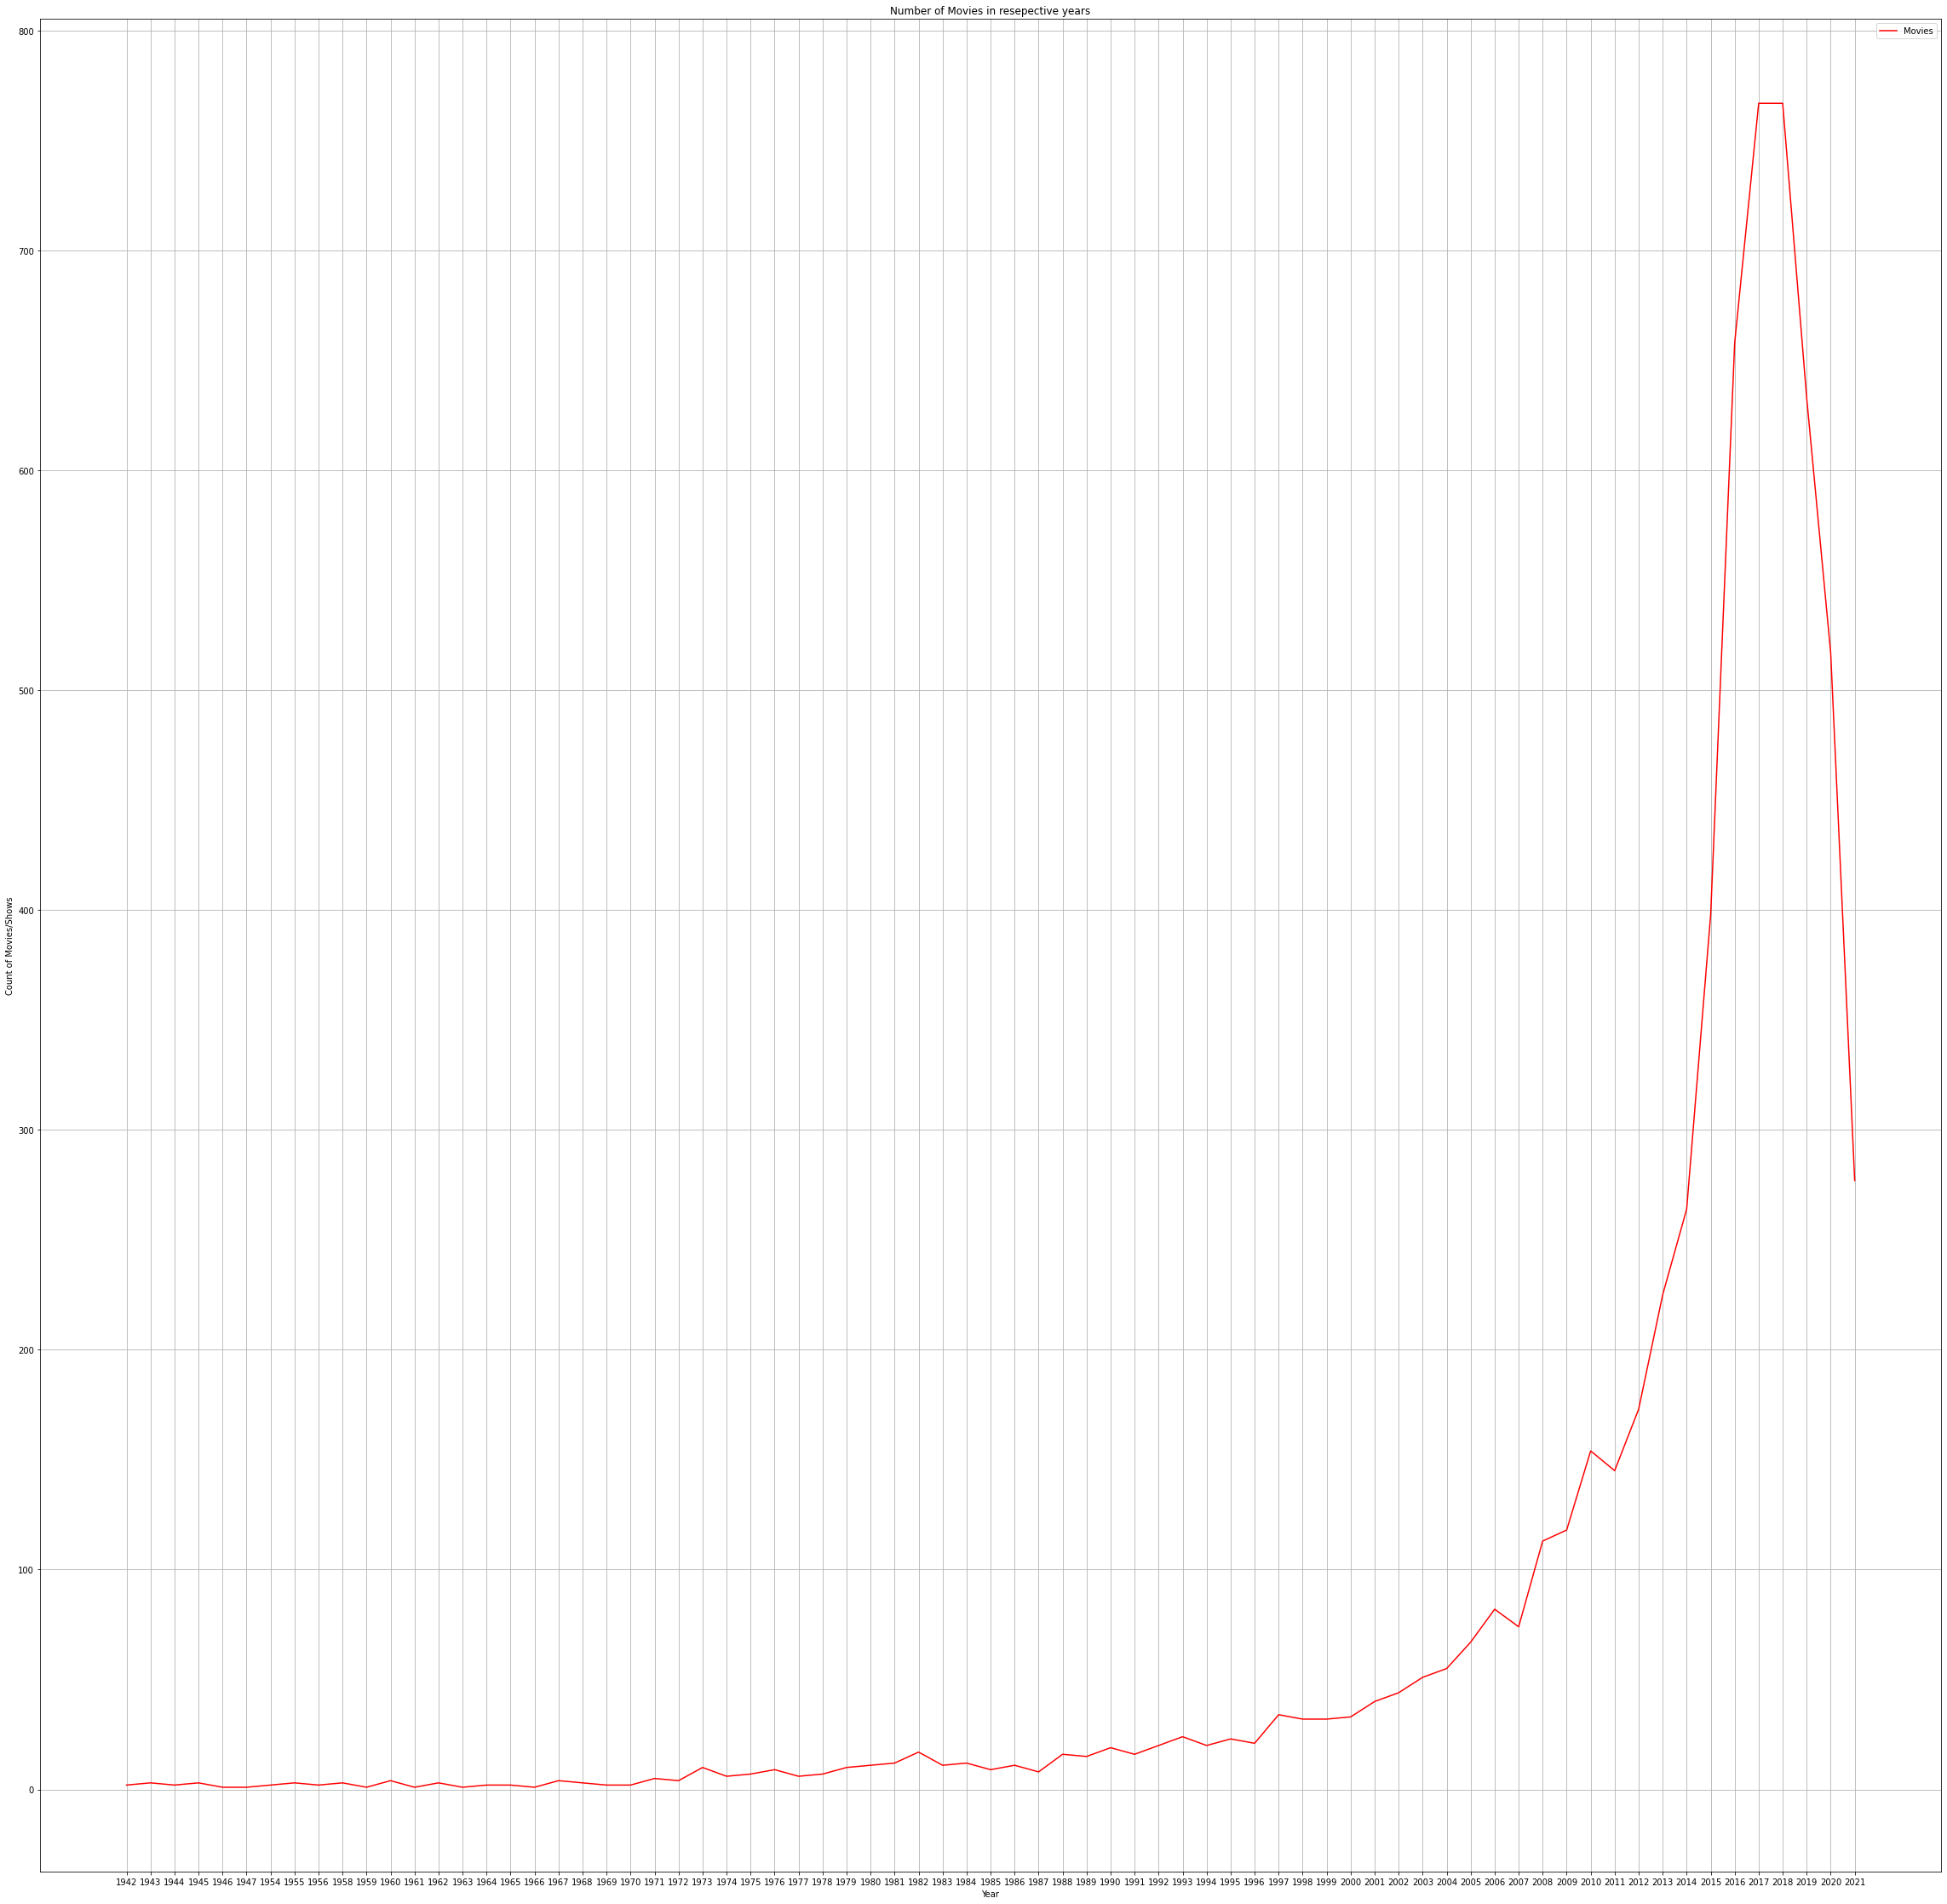

In [303]:
plt.figure(figsize=(40,40)) 
plt.title("Number of Movies in resepective years")
plt.xlabel("Year")
plt.ylabel("Count of Movies/Shows")
plt.plot(year_['release_year'],year_['show_id'],'r',label='Movies')
plt.legend()
plt.grid()

plt.show()


In [304]:
#Latest Films in Netflix
mves=mves.sort_values(by=['release_year','date_added'], ascending=False)
mves[['title','director','release_year']].head(10)

,title,director,release_year
6,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",2021
9,The Starling,Theodore Melfi,2021
12,Je Suis Karl,Christian Schwochow,2021
13,Confessions of an Invisible Girl,Bruno Garotti,2021
18,Intrusion,Adam Salky,2021
23,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore",2021
30,Ankahi Kahaniya,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...",2021
35,The Father Who Moves Mountains,Daniel Sandu,2021
36,The Stronghold,Cédric Jimenez,2021
45,My Heroes Were Cowboys,Tyler Greco,2021


In [305]:
#Movies for which Director Name is missing
mves['director'].value_counts(dropna=False)

NaN                                  189
Rajiv Chilaka                         19
Raúl Campos, Jan Suter                18
Suhas Kadav                           16
Marcus Raboy                          15
                                    ... 
Han Yan                                1
Álvaro Longoria, Gerardo Olivares      1
Anthony Byrne                          1
Rashida Jones, Alan Hicks              1
Frank Capra                            1
Name: director, Length: 4354, dtype: int64

In [306]:
mves['director'].value_counts().head(1)

Rajiv Chilaka    19
Name: director, dtype: int64

In [307]:
mves['country'].value_counts().head(1)

United States    2057
Name: country, dtype: int64

In [308]:
df[df.director=='Rajiv Chilaka']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
406,s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,Things get spooky when Bheem and his buddies t...
407,s408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2009,TV-Y7,68 min,Children & Family Movies,Bheem and Lord Ganesha join forces to save Dho...
408,s409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2011,TV-Y7,67 min,Children & Family Movies,Young lord Krishna has fallen for demoness Maa...
409,s410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2010,TV-Y7,66 min,Children & Family Movies,Krishna needs Bheem’s help: The ruined city of...
410,s411,Movie,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,When a stranger tries to steal an amulet from ...
411,s412,Movie,Chhota Bheem And The Crown of Valhalla,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,To save the kingdom of Valhalla from invasion ...
412,s413,Movie,Chhota Bheem and the Incan Adventure,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,65 min,Children & Family Movies,"When Dholakpur’s princess is kidnapped, Bheem ..."
413,s414,Movie,Chhota Bheem and The ShiNobi Secret,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,After learning of a samurai village under thre...
414,s415,Movie,Chhota Bheem Aur Hanuman,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2012,TV-Y7,68 min,Children & Family Movies,When two evil entities kidnap a princess in a ...
415,s416,Movie,Chhota Bheem aur Krishna,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2009,TV-Y7,68 min,Children & Family Movies,"Centuries after the end of a conqueror's rule,..."


In [309]:
Ctry=pd.DataFrame(mves.groupby('country').count())
Ctry=Ctry.reset_index()

In [310]:
#Countries having Maximum number of movies in Netfli
Ctry=Ctry.sort_values(by=['show_id'],ascending=False)
Ctry

,country,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description
525,United States,2057,2057,2057,1999,1864,2057,2057,2057,2054,2057,2057
218,India,893,893,893,881,878,893,893,893,893,893,893
440,United Kingdom,206,206,206,191,173,206,206,206,206,206,206
50,Canada,122,122,122,116,109,122,122,122,122,122,122
384,Spain,97,97,97,95,85,97,97,97,97,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...
227,"India, Mexico",1,1,1,1,1,1,1,1,1,1,1
226,"India, Malaysia",1,1,1,1,1,1,1,1,1,1,1
225,"India, Japan",1,1,1,1,1,1,1,1,1,1,1
224,"India, Iran",1,1,1,1,1,1,1,1,1,1,1


In [311]:
ctry=Ctry.head(10)

Text(0, 0.5, 'count of number of mves produced')

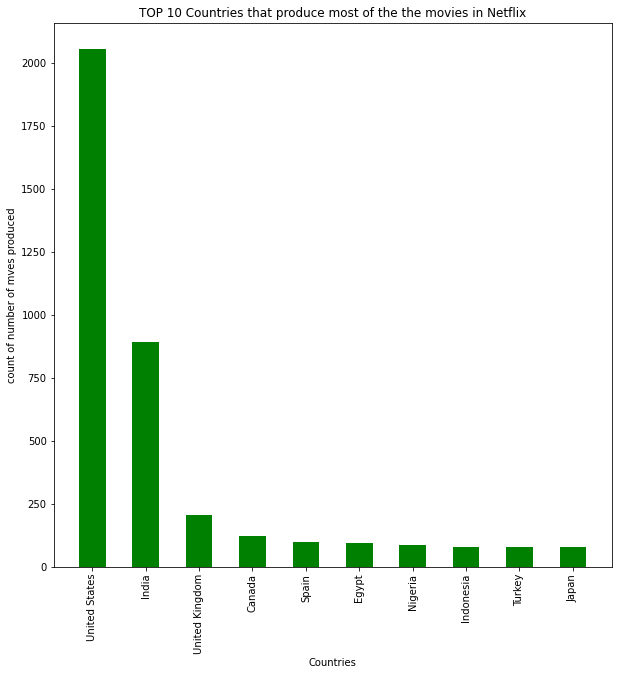

In [312]:
plt.figure(figsize=(10,10)) 
plt.bar(ctry['country'],ctry['show_id'],width=0.5,color='g', label='count of number of mves produced')
plt.title('TOP 10 Countries that produce most of the the movies in Netflix')
plt.xlabel('Countries')
plt.xticks(rotation=90)
plt.ylabel('count of number of mves produced')

In [313]:
mves['cast'].value_counts(dropna=False)

NaN                                                                                                                                                               475
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                            13
Samuel West                                                                                                                                                        10
Jeff Dunham                                                                                                                                                         7
Craig Sechler                                                                                                                                                       6
                                                                                                                                                                 ... 
Adam

In [314]:
Rating=pd.DataFrame(mves.groupby('rating').count())
Rating.reset_index()

,rating,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,description
0,66 min,1,1,1,1,1,1,1,1,0,1,1
1,74 min,1,1,1,1,1,1,1,1,0,1,1
2,84 min,1,1,1,1,1,1,1,1,0,1,1
3,G,41,41,41,41,40,41,41,41,41,41,41
4,NC-17,3,3,3,2,3,3,3,3,3,3,3
5,NR,75,75,75,75,58,75,75,75,75,75,75
6,PG,287,287,287,286,279,281,287,287,287,287,287
7,PG-13,490,490,490,489,477,482,490,490,490,490,490
8,R,797,797,797,794,788,787,797,797,797,797,797
9,TV-14,1427,1427,1427,1393,1298,1307,1427,1427,1427,1427,1427


Text(0.5, 1.0, 'Number of Movies in respective Movie Rating in Netflix')

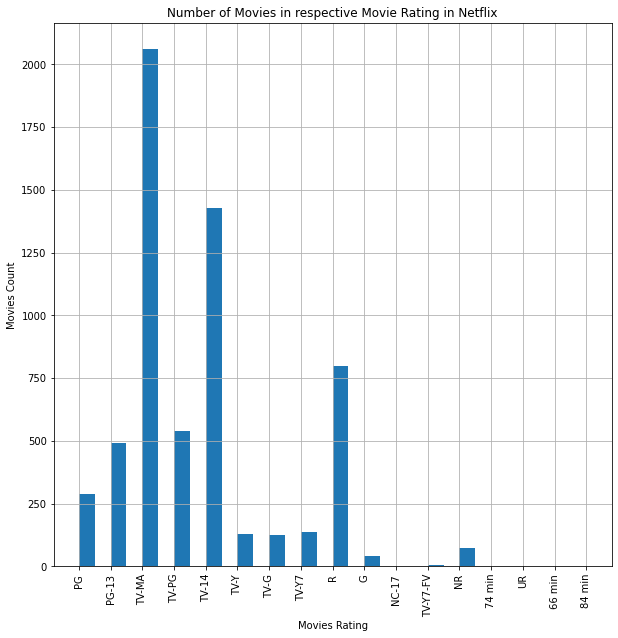

In [315]:
plt.figure(figsize=(10,10)) 
mves['rating'].hist(bins=32)
plt.xlabel('Movies Rating')
plt.ylabel('Movies Count')
plt.xticks(rotation=90)
plt.title('Number of Movies in respective Movie Rating in Netflix')

In [316]:
mves['listed_in'].value_counts()

Dramas, International Movies                               362
Documentaries                                              359
Stand-Up Comedy                                            334
Comedies, Dramas, International Movies                     274
Dramas, Independent Movies, International Movies           252
                                                          ... 
Documentaries, Faith & Spirituality, Music & Musicals        1
Comedies, Independent Movies, Music & Musicals               1
International Movies, Romantic Movies, Sci-Fi & Fantasy      1
Action & Adventure, Romantic Movies, Sci-Fi & Fantasy        1
Horror Movies, LGBTQ Movies, Music & Musicals                1
Name: listed_in, Length: 278, dtype: int64

In [317]:
##################################------TVShows--------#################################
Shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8797,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8798,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8799,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8802,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [318]:
Shows['director'].value_counts(dropna=False)

NaN                                  2446
Alastair Fothergill                     3
Hsu Fu-chun                             2
Iginio Straffi                          2
Shin Won-ho                             2
                                     ... 
Juliana Vicente                         1
Chang Chin-jung, Chen Rong-hui          1
Thierry Demaizière, Alban Teurlai       1
Manolo Caro                             1
Michael Cumming                         1
Name: director, Length: 223, dtype: int64

In [319]:
Shows['cast'].value_counts(dropna=False)

NaN                                                                                                                                                                 350
David Attenborough                                                                                                                                                   14
Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson                                                                                             4
Dave Chappelle                                                                                                                                                        3
You, Reina Triendl, Yoshimi Tokui, Azusa Babazono, Ryota Yamasato, Shono Hayama                                                                                       2
                                                                                                                                                                

In [320]:
Shows['country'].value_counts()

United States                                    760
United Kingdom                                   213
Japan                                            169
South Korea                                      158
India                                             79
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: country, Length: 196, dtype: int64

In [321]:
Rating_1=pd.DataFrame(Shows.groupby('rating').count())
Rating_1.reset_index()

,rating,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,description
0,NR,5,5,5,0,5,5,4,5,5,5,5
1,R,2,2,2,1,2,1,2,2,2,2,2
2,TV-14,733,733,733,64,657,623,730,733,733,733,733
3,TV-G,94,94,94,4,79,81,94,94,94,94,94
4,TV-MA,1145,1145,1145,124,987,1007,1143,1145,1145,1145,1145
5,TV-PG,323,323,323,21,261,269,321,323,323,323,323
6,TV-Y,176,176,176,7,153,143,175,176,176,176,176
7,TV-Y7,195,195,195,9,179,153,194,195,195,195,195
8,TV-Y7-FV,1,1,1,0,1,1,1,1,1,1,1


Text(0.5, 1.0, 'Number of Shows in respective Movie Rating in Netflix')

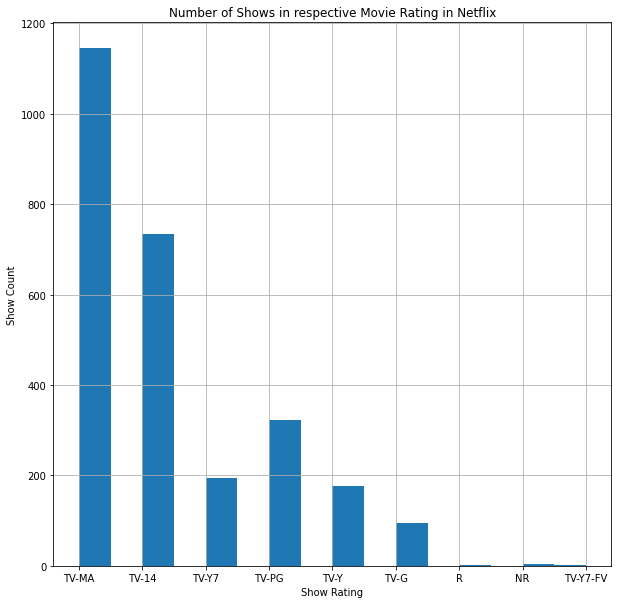

In [322]:
plt.figure(figsize=(10,10)) 
Shows['rating'].hist(bins=16)
plt.xlabel('Show Rating')
plt.ylabel('Show Count')
plt.title('Number of Shows in respective Movie Rating in Netflix')

In [323]:
year_1=pd.DataFrame(Shows.groupby('release_year').count())
year_1=year_1.reset_index()

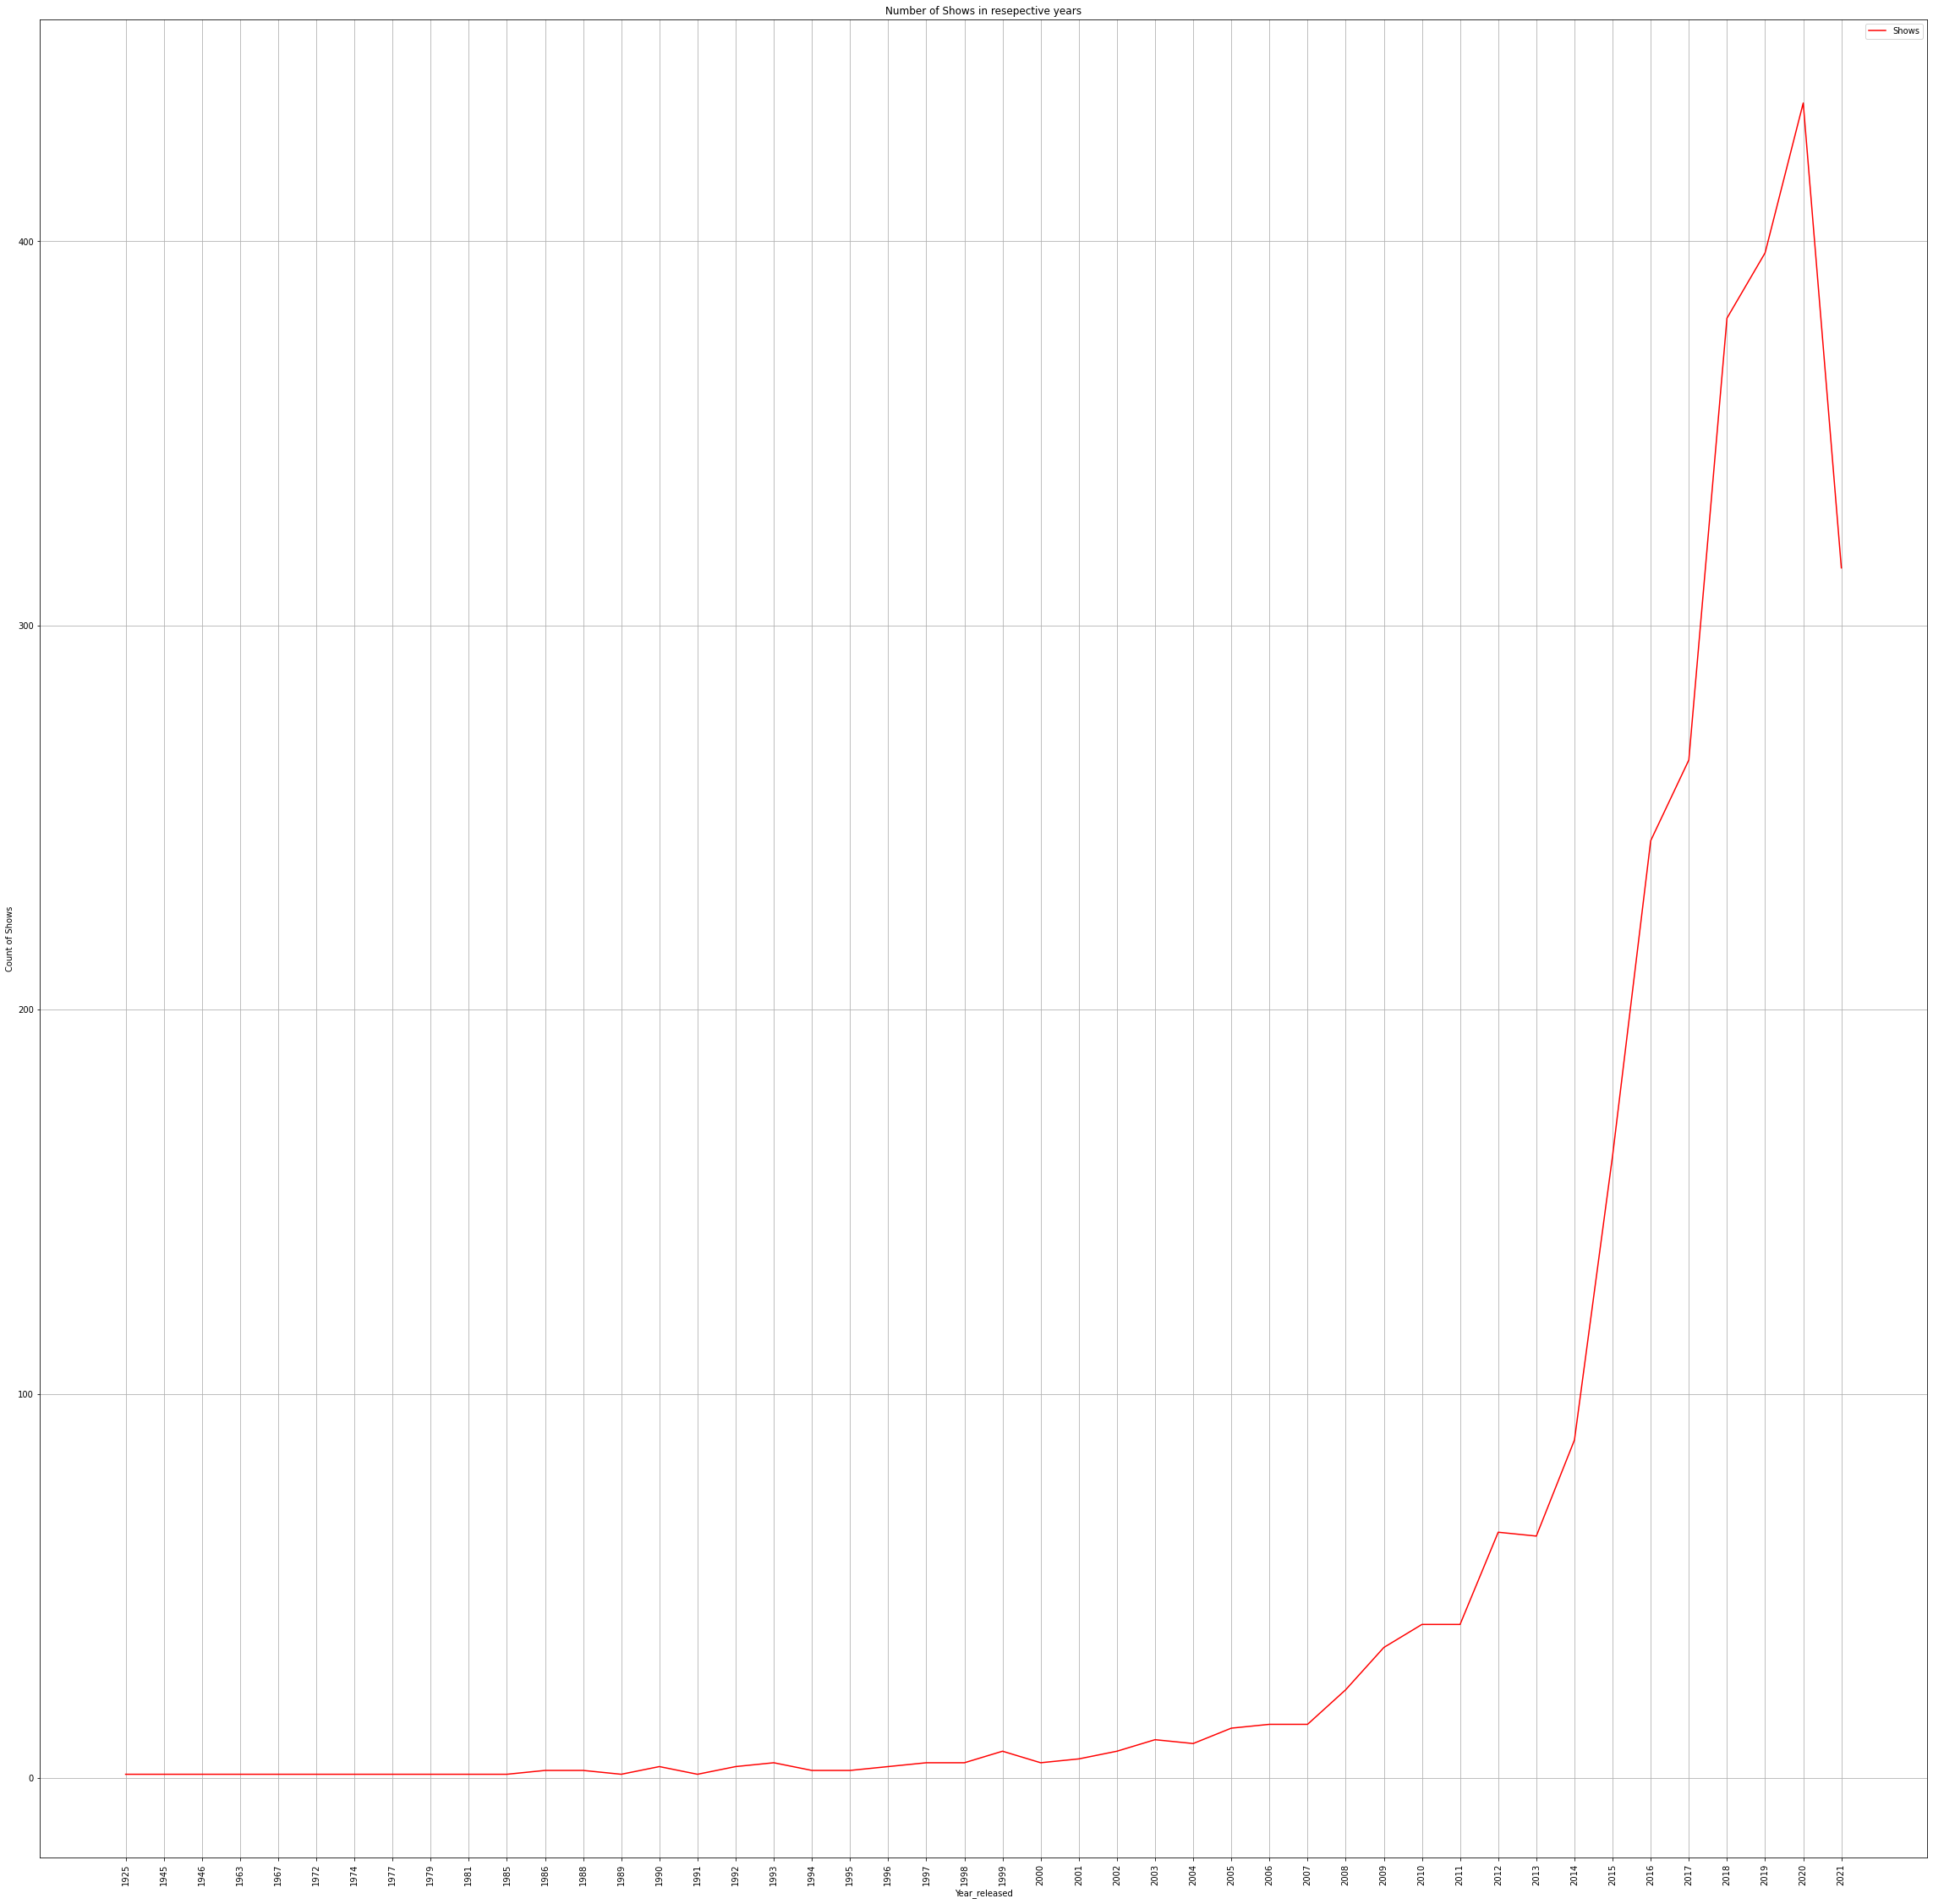

In [324]:
plt.figure(figsize=(40,40)) 
plt.title("Number of Shows in resepective years")
plt.xlabel("Year_released")
plt.ylabel("Count of Shows")
plt.plot(year_1['release_year'],year_1['show_id'],'r',label='Shows')
plt.legend()
plt.grid()
plt.xticks(rotation=90)
plt.show()

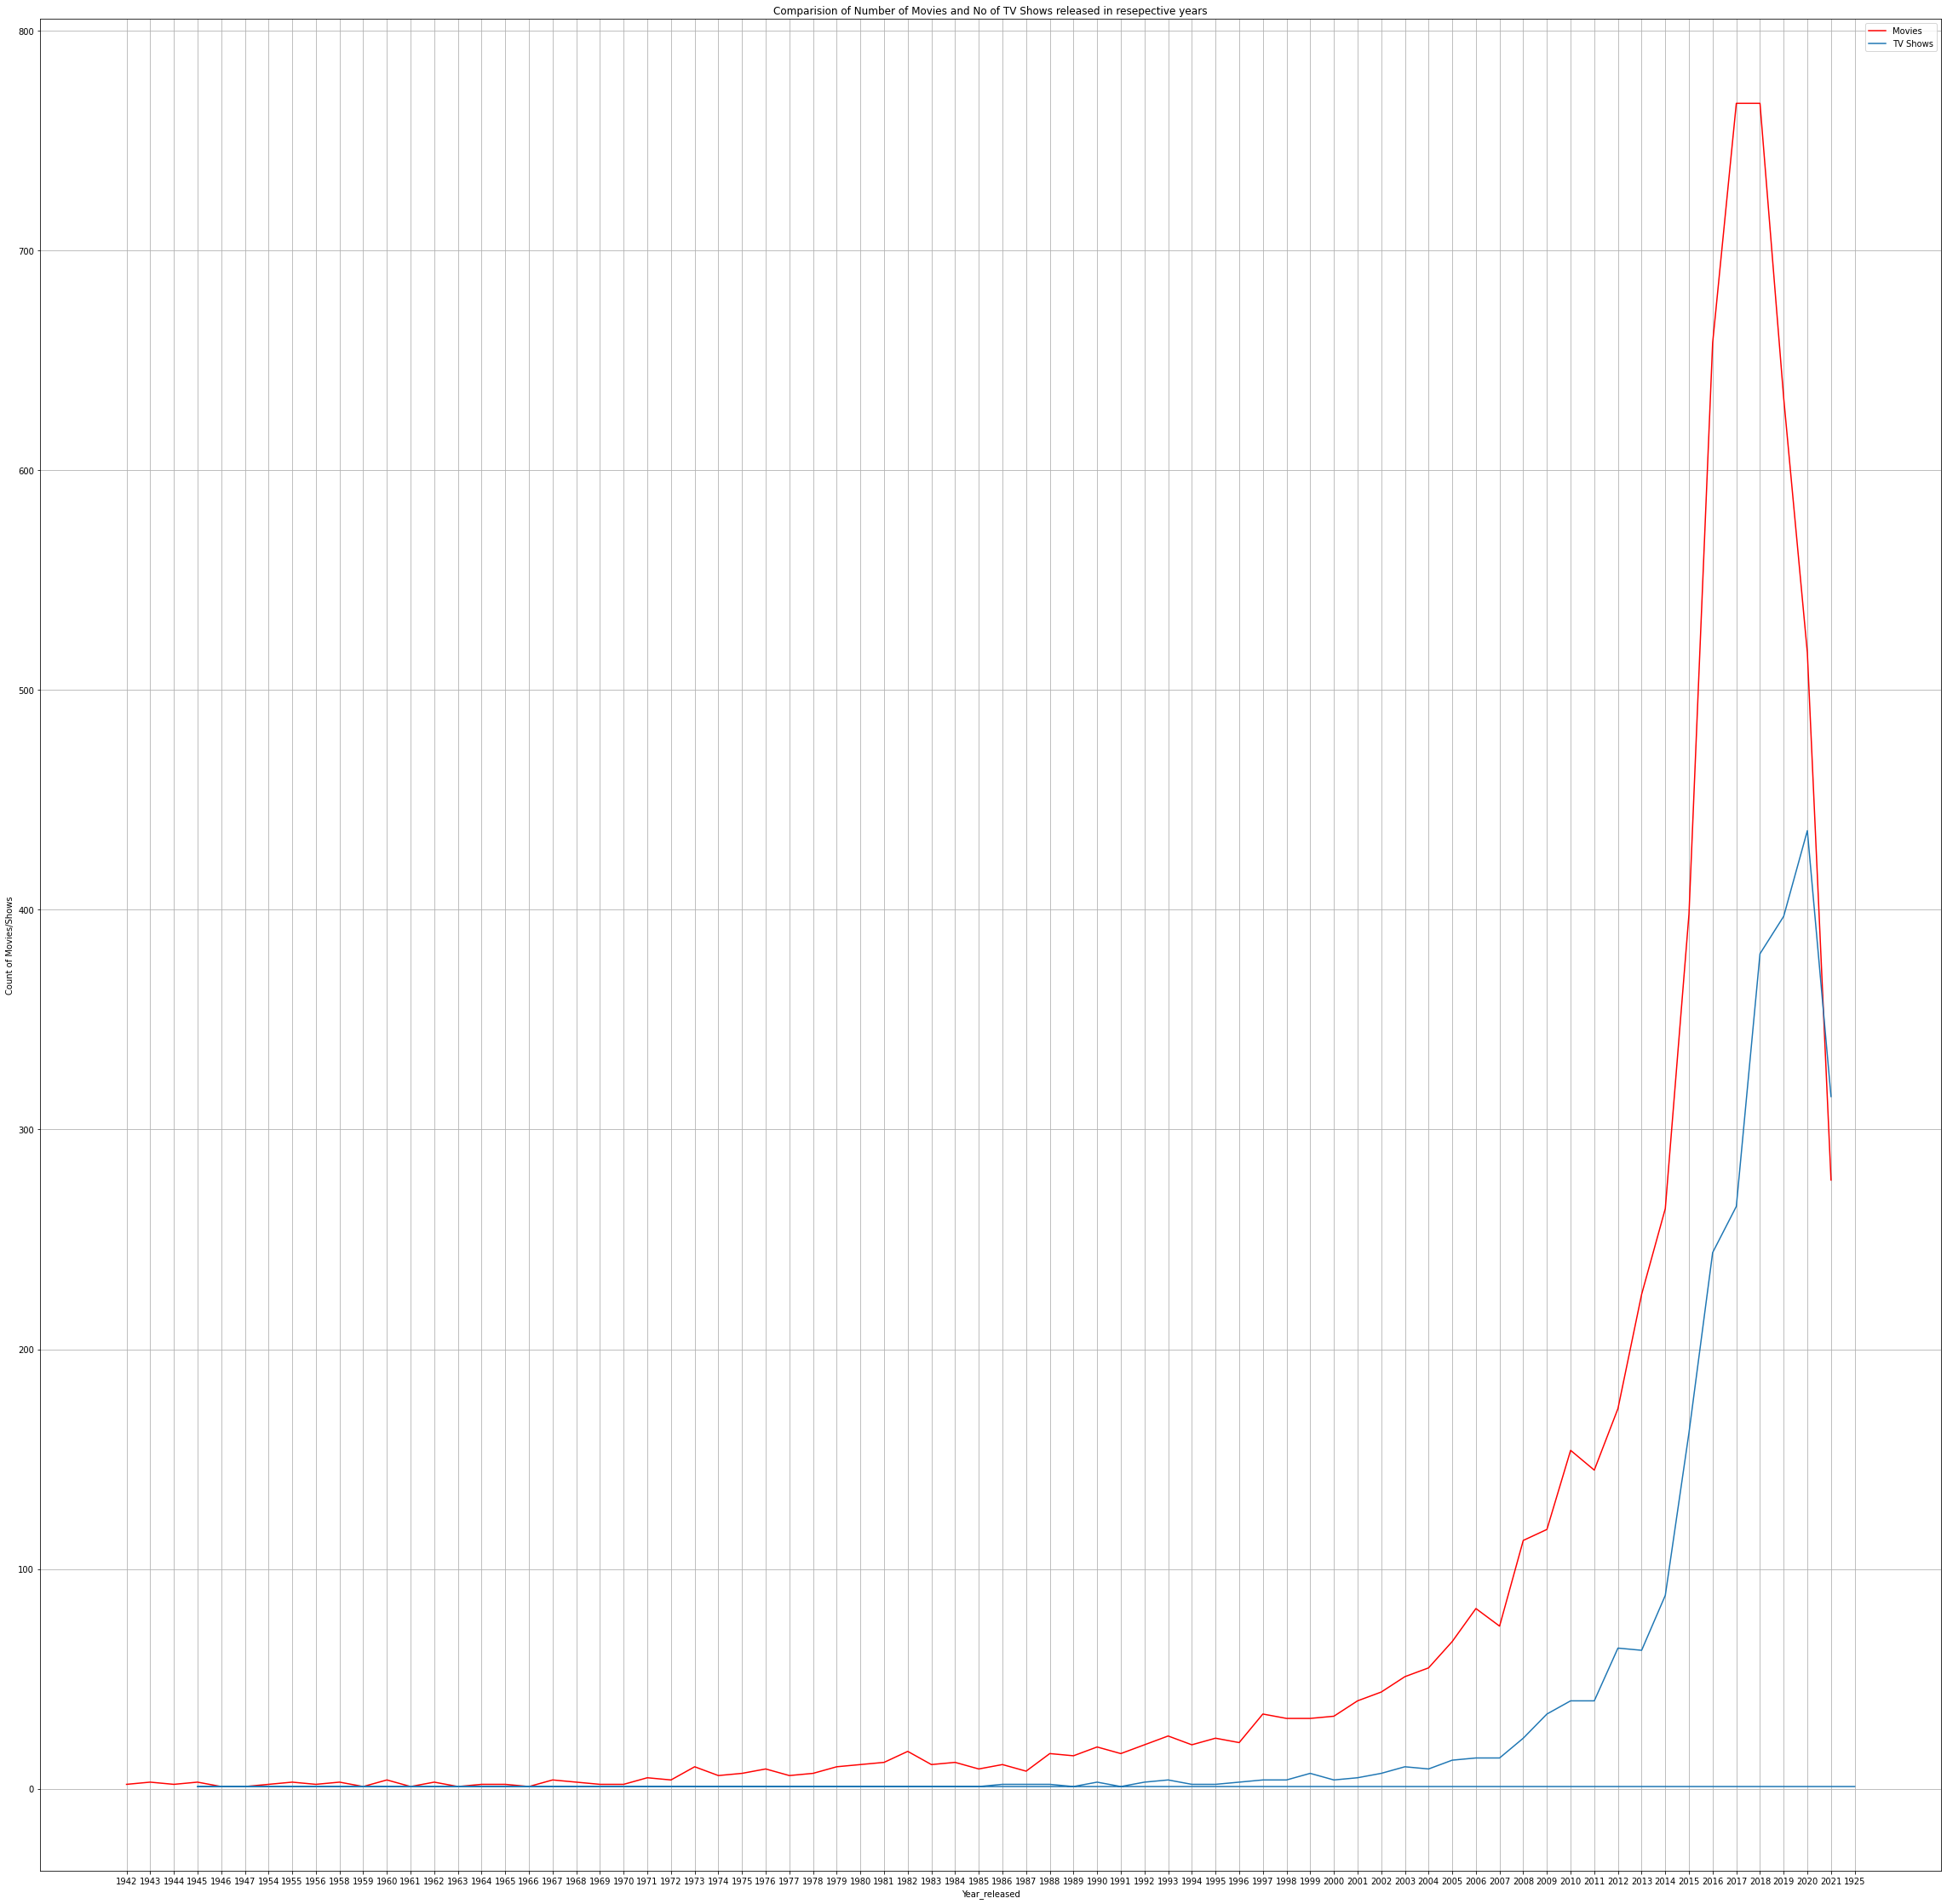

In [325]:
plt.figure(figsize=(40,40)) 
plt.title("Comparision of Number of Movies and No of TV Shows released in resepective years")
plt.xlabel("Year_released")
plt.ylabel("Count of Movies/Shows")
plt.plot(year_['release_year'],year_['show_id'],'r',label='Movies')
plt.plot(year_1['release_year'],year_1['show_id'],label='TV Shows')
plt.legend()
plt.grid()

plt.show()

In [326]:
Ctry_1=pd.DataFrame(Shows.groupby('country').count())
Ctry_1=Ctry_1.reset_index()

In [327]:
Ctry_1=Ctry_1.sort_values(by=['show_id'],ascending=False)
ctry_1=Ctry_1.head(10)

Text(0, 0.5, 'count of number of mves produced')

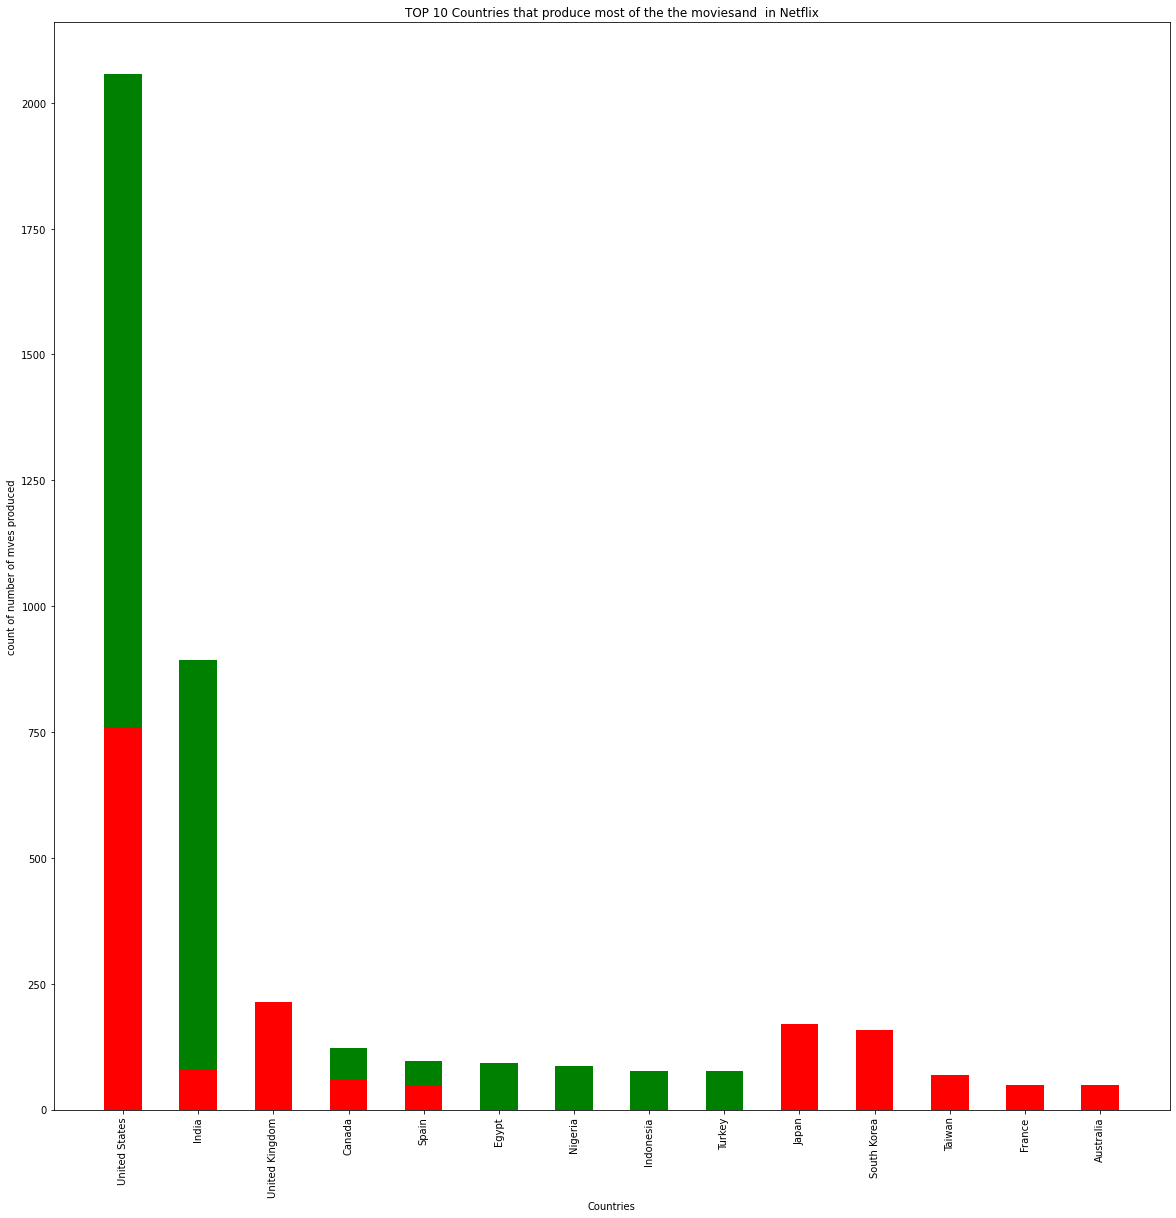

In [328]:
plt.figure(figsize=(20,20)) 
plt.bar(ctry['country'],ctry['show_id'],width=0.5,color='g', label='count of number of mves produced')
plt.bar(ctry_1['country'],ctry_1['show_id'],width=0.5,color='r', label='count of number of Shows produced')
plt.title('TOP 10 Countries that produce most of the the moviesand  in Netflix')
plt.xlabel('Countries')
plt.xticks(rotation=90)
plt.ylabel('count of number of mves produced')

In [329]:
Ctry_2=pd.DataFrame(df.groupby('country').count())
Ctry_2=Ctry_2.reset_index()
Ctry_2=Ctry_2.sort_values(by=['show_id'],ascending=False).head(10)

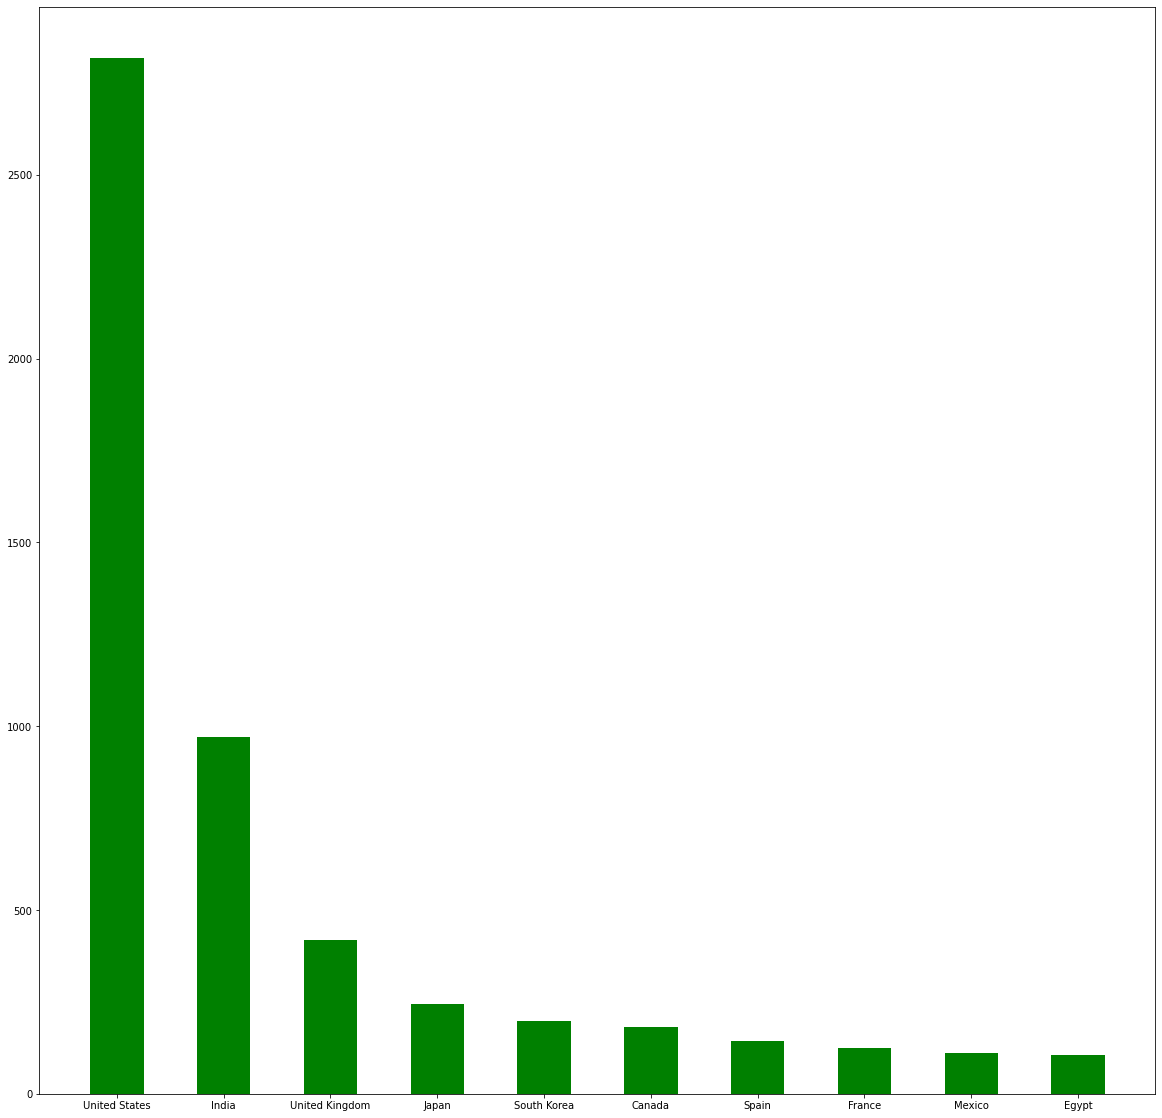

In [330]:
plt.figure(figsize=(20,20)) 
plt.bar(Ctry_2['country'],Ctry_2['show_id'],width=0.5,color='g', label='count of number of mves produced')
plt.show()

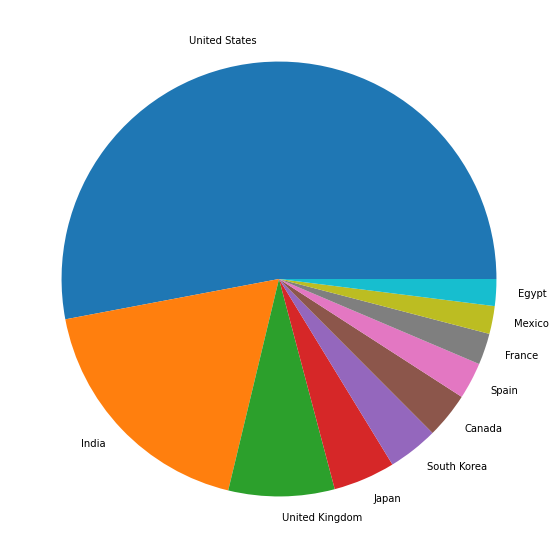

In [331]:
plt.figure(figsize=(10,10)) 
x=Ctry_2['show_id']
y=Ctry_2['country']
myexplode = [0.2, 0, 0, 0]
plt.pie(x, labels = y)
plt.show() 

United States                             2817
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64